In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.backends.backend_pdf import PdfPages

import dpkt
import numpy as np
import time
import brewer2mpl

from AttackAnalysis import compute_effective_rate, compute_sending_rate
from analyze import compute_global_throughput, parse_file, removeOutliers
from read_conf import ReadHosts

In [2]:
host_to_ip, ip_to_host = ReadHosts('../experiment_conf/experiment_oak_clone.conf')
interval = 5
root_dir = '/data/ddos-oakland/workdir/results-3.2-new/'
figures_dir = 'paper-plots/exp2-2/'

In [3]:
linestyles = ['-', '--', '-.', ':']
markers = []
for m in Line2D.markers:
    try:
        if len(m) == 1 and m != ' ':
            markers.append(m)
    except TypeError:
        pass

styles = markers + [
    r'$\lambda$',
    r'$\bowtie$',
    r'$\circlearrowleft$',
    r'$\clubsuit$',
    r'$\checkmark$']

# Attacker Analysis

In [4]:
attacker_interval = 5

## Cookies

In [5]:
attacker_rates_cookies = {}

for i in [1,2,3,4,5,6,7,8,9,10]:
    attacker = 'attacknode-' + str(i)
    attack_file_template = attacker + '-attack_log-tcpdump.cap'
    attacker_ip = host_to_ip[attacker]

    cap_file = root_dir + 'results-results-nping-cookies-new/' + attack_file_template

    rate = compute_effective_rate(cap_file, attacker_interval, False)[attacker_ip]
    attacker_rates_cookies[attacker] = rate

[WARNING:] Packets in cap file are out of order.
+----------------------------------------------------+
Statistics for host 10.1.4.3
Total number of attempted connections: 	533178
Total number of acked connections:     	10087
Total number of failed connections:    	128648
Total number of replies received:      	10337
Average ACK rate:                      	28.0194444444
+----------------------------------------------------+
+----------------------------------------------------+
Statistics for host 10.1.4.7
Total number of attempted connections: 	2
Total number of acked connections:     	1
Total number of failed connections:    	1
Total number of replies received:      	1
Average ACK rate:                      	0.2
+----------------------------------------------------+
[WARNING:] Packets in cap file are out of order.
+----------------------------------------------------+
Statistics for host 10.1.4.4
Total number of attempted connections: 	534126
Total number of acked connections:     	8

[WARNING:] Packets in cap file are out of order.
+----------------------------------------------------+
Statistics for host 10.1.7.7
Total number of attempted connections: 	531028
Total number of acked connections:     	7803
Total number of failed connections:    	130016
Total number of replies received:      	8792
Average ACK rate:                      	21.675
+----------------------------------------------------+
+----------------------------------------------------+
Statistics for host 10.1.7.6
Total number of attempted connections: 	2
Total number of acked connections:     	0
Total number of failed connections:    	2
Total number of replies received:      	0
Average ACK rate:                      	0.0
+----------------------------------------------------+
+----------------------------------------------------+
Statistics for host 10.1.7.4
Total number of attempted connections: 	10
Total number of acked connections:     	1
Total number of failed connections:    	9
Total number of rep

## Challenges (k=2 , m=17)

In [6]:
attacker_rates_challenges = {}
max_len = 0
for i in [1,2,3,4,5,6,7,8,9,10]:
    attacker = 'attacknode-' + str(i)
    attack_file_template = attacker + '-attack_log-tcpdump.cap'
    attacker_ip = host_to_ip[attacker]

    cap_file = root_dir + 'results-results-nping-challenges-new/' + attack_file_template

    rate = compute_effective_rate(cap_file, attacker_interval, False)[attacker_ip]
    max_len = np.maximum(max_len, len(rate))
    attacker_rates_challenges[attacker] = rate

[WARNING:] Received RST packet for a non tracked connection at host 10.1.4.3 at ts 1511838714.879852. This should only happen for benign clients.
[WARNING:] Will display this warning only once.
[WARNING:] Packets in cap file are out of order.
+----------------------------------------------------+
Statistics for host 10.1.4.3
Total number of attempted connections: 	5877
Total number of acked connections:     	78
Total number of failed connections:    	5728
Total number of replies received:      	3652
Average ACK rate:                      	0.236363636364
+----------------------------------------------------+
+----------------------------------------------------+
Statistics for host 10.1.4.7
Total number of attempted connections: 	2
Total number of acked connections:     	1
Total number of failed connections:    	1
Total number of replies received:      	8
Average ACK rate:                      	0.2
+----------------------------------------------------+
[WARNING:] Received RST packet for

[WARNING:] Received RST packet for a non tracked connection at host 10.1.7.5 at ts 1511838776.079871. This should only happen for benign clients.
[WARNING:] Will display this warning only once.
+----------------------------------------------------+
Statistics for host 10.1.7.7
Total number of attempted connections: 	9
Total number of acked connections:     	1
Total number of failed connections:    	8
Total number of replies received:      	0
Average ACK rate:                      	0.2
+----------------------------------------------------+
+----------------------------------------------------+
Statistics for host 10.1.7.6
Total number of attempted connections: 	8
Total number of acked connections:     	0
Total number of failed connections:    	8
Total number of replies received:      	0
Average ACK rate:                      	0.0
+----------------------------------------------------+
+----------------------------------------------------+
Statistics for host 10.1.7.5
Total number of atte

{'attacknode-3': array([ 53,   0, 170,  45, 135,  12, 178,  26, 156,  26, 117,  18, 134,
        53, 133, 137, 169, 125, 105, 233,  64, 180,  86,  93, 114,  54,
       170, 126,  72,  79,  73,  41, 109,  87, 206,  56, 100,  53, 136,
       155,  81, 102, 176,  56,  76, 111,  81, 223,  34,  73,  43, 208,
        88,  96,  97, 140, 134,  76, 135,  54, 105,  57,  68,  60, 157,
        58, 162,  98, 167,  98,  77, 164,   8]), 'attacknode-2': array([ 39,   0, 198,   3, 230,  33, 244, 129, 224,  45, 489,  39, 172,
        91, 123, 137, 134, 167, 100, 177,  58, 107,  74, 142,  96, 137,
       116, 126,  95,  52, 181,  79, 103,  93, 185,  99, 130,  89, 118,
       130, 178, 198, 108,  65, 117,  87,  86, 183, 105,  82, 109, 140,
       105,  86, 244, 107,  92,  86,  95,  43, 120, 140, 105, 114, 133,
       102, 259,  95, 118, 110,  69, 173,   2]), 'attacknode-1': array([ 49,   0, 272,   3, 148,   9, 455,  16, 314,  59, 258,  64, 157,
        89, 244, 185,  91, 381,  76, 152,  99, 144, 148, 303,

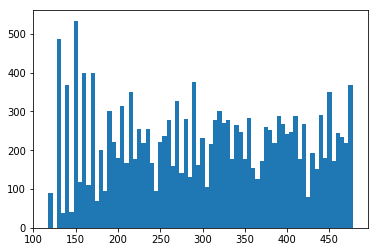

In [7]:
num_buckets = 360/attacker_interval
buckets = np.arange(120, 480, attacker_interval)

cumulative_rates = np.array([0]*num_buckets)
print attacker_rates_cookies
for att,rates in attacker_rates_cookies.items():
    curr_index = 0
    for r in rates:
        if curr_index >= num_buckets:
            break
        cumulative_rates[curr_index] += r
        curr_index += 1

print cumulative_rates
plt.bar(buckets, cumulative_rates/attacker_interval, width=attacker_interval)
print "Average ACK rate reaching the server ", np.average(cumulative_rates/attacker_interval)

## Putting things together

In [8]:
# change these for each section depending on your need
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
colors = bmap.mpl_colors

params = {
   'axes.labelsize': 9,
   'text.fontsize': 10,
   'legend.fontsize': 9,
   'legend.handlelength': 2,
   'xtick.labelsize': 8,
   'ytick.labelsize': 8,
   'text.usetex': False,
   'figure.figsize': [6, 2]
   }
plt.rcParams.update(params)

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  mplDeprecation)


6.15277777778
225.444444444


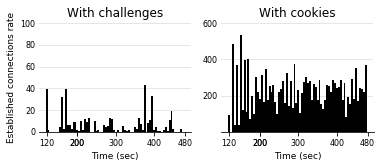

In [10]:
labels = ['challenges', 'cookies']
#labels=['cookies']
attacker_rates = {}
attacker_rates['cookies'] = attacker_rates_cookies
attacker_rates['challenges'] = attacker_rates_challenges

fig = plt.figure()

num_buckets = 360/attacker_interval
buckets = np.arange(120, 480, attacker_interval)

k = 1
titles = ['With challenges', 'With cookies']
#titles = ['With cookies']
for label in labels:
    ax = fig.add_subplot(1,2,k)

    local_rates = attacker_rates[label]
    cumulative_rates = np.array([0]*num_buckets)
    for att,rates in local_rates.items():
        curr_index = 0
        for r in rates:
            if curr_index >= num_buckets:
                break
            cumulative_rates[curr_index] += r
            curr_index += 1
    
    ax.bar(buckets, cumulative_rates/attacker_interval, width=5,
            linewidth=0, color='black')
    ax.set_xticks([120,200,200,300,400,480])
    ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_axisbelow(True)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis='x', direction='out')
    ax.tick_params(axis='y', length=0)
    plt.title(titles[k-1])
    ax.set_xlabel('Time (sec)')
    
    if k == 1:
        #ax.set_ylim(0,100)
        ax.set_ylabel('Established connections rate')
        ax.set_ylim(0,100)
    else:
        ax.set_yticks([200,400,600])
    
    k += 1
    
    print np.average(cumulative_rates/attacker_interval)

plt.savefig(figures_dir + 'attack_rates.pdf', bbox_inches='tight')